# Project #1 - Exploratory data analysis

## Import used packages

In [230]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Loading data from - in our case it is a csv file

In [231]:
df_full = pd.read_csv('./googleplaystore.csv', sep=',')

## Let's take a look at the basic dataset information

### Dataset shape?
- 13 cols, 10841 rows


### Dataset cols names with datatypes?

In [232]:
df_full.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Are there any missing values?
- Mostly not, a few columns have negligibly few missing values
- Rating has cca 1/11 of records empty

In [233]:
df_full.isna().sum().sort_values()

App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
Type                 1
Content Rating       1
Android Ver          3
Current Ver          8
Rating            1474
dtype: int64

### Removing records without value
- Since the dataset is large enough and the data are not dependent on each other, I choose the option that deletes records without value

In [234]:
df_full = df_full.dropna()

## Now let's write down a few unknowns we wanna find out
1. Count of apps for each category
2. Count of apps for each Content rating (Age group the app is targeted at)
3. Count of apps for Installs number category

### 1. Count of apps for each category
- Category named family has the highest number of applications (almost 1750)
- The games category has the second highest number of applications, third is tools category
- The other categories have significantly fewer applications than the 3 mentioned above
- Beauty, Events, Parenting are the categories with the lowest frequency 


<AxesSubplot: xlabel='Count of apps', ylabel='Category'>

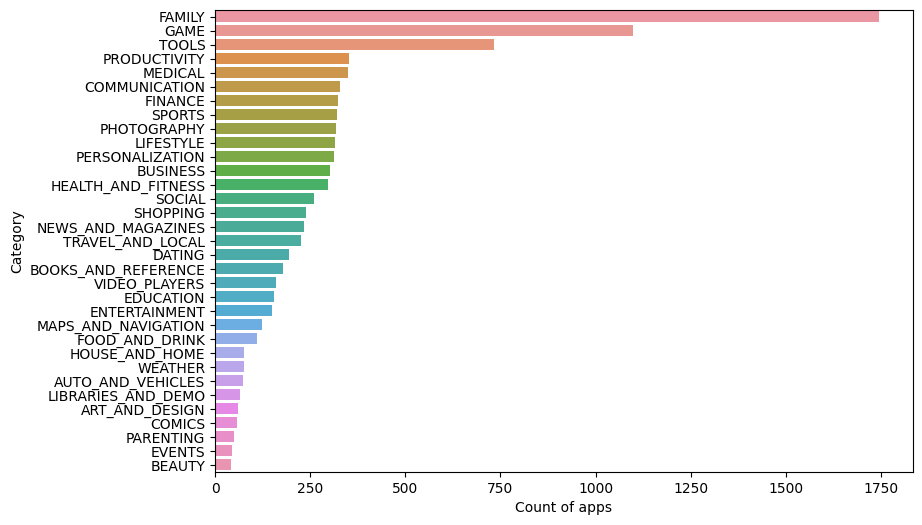

In [235]:
df_one = df_full.groupby('Category').App.count().sort_values(ascending=False).reset_index(name="Count of apps")
fig = plt.figure(figsize=(9, 6))

sns.barplot(data=df_one, x='Count of apps', y='Category')

### 2. Count of apps for each Content rating (Age group the app is targeted at)
- We can see that applications are mostly targeted at Everyone, age doesn't matter
- Second highest number has Teen Content Rating
- Everyone 10+ and Mature 17+ Content Ratings have similar number of applications
- 18+ has only 3 apps and Unrated 1

    Content Rating  Count of apps
0  Adults only 18+              3
1         Everyone           7414
2     Everyone 10+            397
3       Mature 17+            461
4             Teen           1084
5          Unrated              1


<AxesSubplot: xlabel='Content Rating', ylabel='Count of apps'>

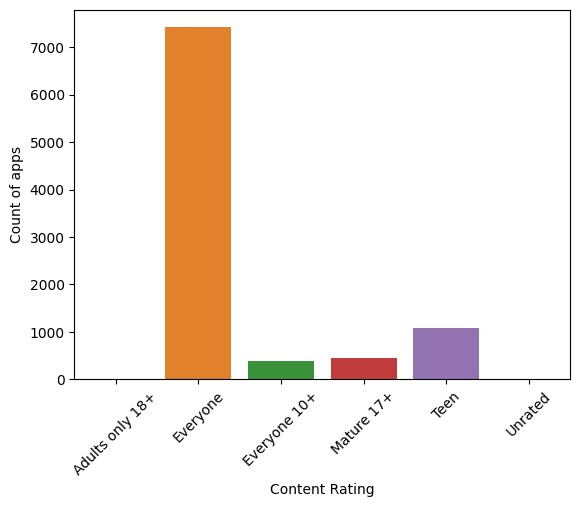

In [236]:
df_three = df_full.groupby('Content Rating').App.count().reset_index(name="Count of apps")

print(df_three)

plt.xticks(rotation=45)
sns.barplot(data=df_three, y='Count of apps', x='Content Rating')

### 1. Count of apps for Installs number category
- Apps most often have 1,000,000+ installs
- 1,000,000,000+ installs have only few apps, cca 50




<AxesSubplot: xlabel='Count of apps', ylabel='Installs'>

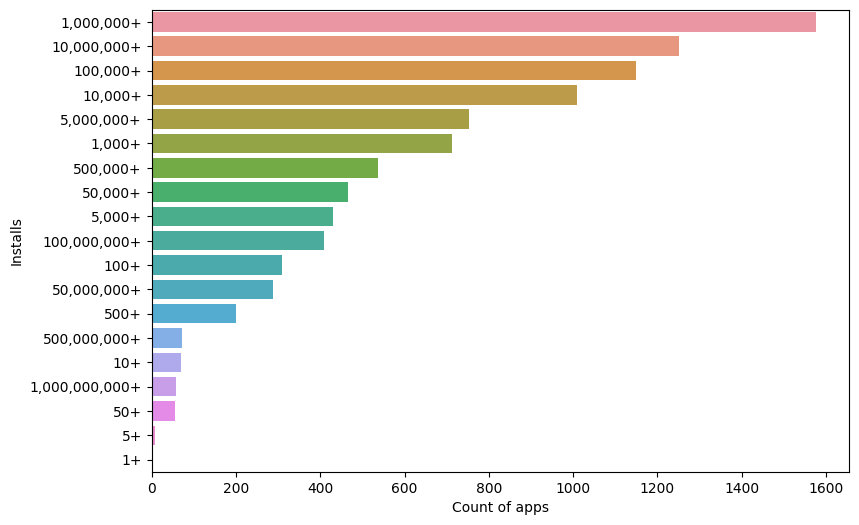

In [237]:
df_three = df_full.groupby('Installs').App.count().sort_values(ascending=False).reset_index(name="Count of apps")
fig = plt.figure(figsize=(9, 6))

sns.barplot(data=df_three, x='Count of apps', y='Installs')

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_23516\4002458509.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_four['Price'] = df_four['Price'].str.replace('$', '').astype(float)


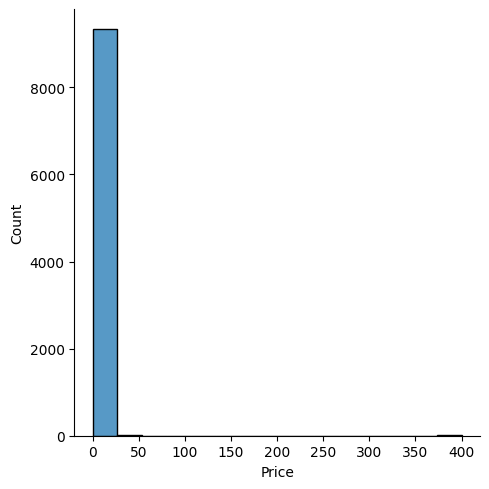

In [238]:
# df_three = df_full.groupby('Type').App.count().reset_index(name="Count of apps")

# sns.barplot(data=df_three, x='Type', y='Count of apps')

df_four = df_full
df_four['Price'] = df_four['Price'].str.replace('$', '').astype(float)


# fig = plt.figure(figsize=(16, 9))
# sns.scatterplot(data=df_full, x='Category', y='Price', hue='Type')

sns.displot(df_four.Price) #cetnost domu urcite ceny